In [2]:
#Basic forecasting time series (See forecasting module for module using autocorrelation and PSD from the full distribution)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
#load data 
url = 'https://www.datahubbs.com/wp-content/uploads/2017/05/decomposition.csv' # 1D daily supply chain data
data = pd.read_csv(url, sep=',')
data.columns = ['date', 'y']
data = data.set_index(pd.to_datetime(data.iloc[:,0])).drop('date', axis=1)
data.head()

,y
date,
2013-01-01,16.650798
2013-01-02,6.651429
2013-01-03,16.537404
2013-01-04,19.662590
2013-01-05,6.632995


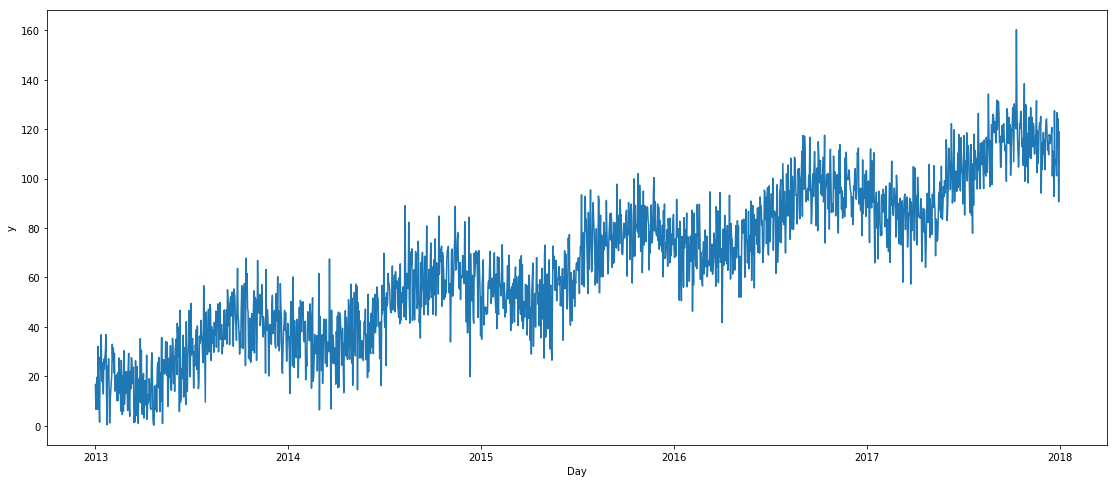

In [17]:
plt.figure(figsize=(19,8))
plt.plot(data['y'])
plt.ylabel('y')
plt.xlabel('Day')
plt.show()

In [19]:
#Split data into training and test set, cut by a date
train = data.loc[data.index < '2017-01-01']
test = data.loc[data.index > '2017-01-01']

In [20]:
train.head()

,y
date,
2013-01-01,16.650798
2013-01-02,6.651429
2013-01-03,16.537404
2013-01-04,19.662590
2013-01-05,6.632995


In [43]:
# Monthly cycle during the year 
df_year = pd.DataFrame({"y": train['y'].resample("M").sum()})
df_year['m_avg'] = df_year.y.rolling(center=True, window=12).mean()
df_year.head(20)

,y,m_avg
date,,
2013-01-31,573.380450,NaN
2013-02-28,527.714935,NaN
2013-03-31,466.634457,NaN
2013-04-30,397.257325,NaN
2013-05-31,696.166346,NaN
2013-06-30,799.167200,NaN
2013-07-31,1008.446020,905.527941
2013-08-31,1181.793629,953.941605
2013-09-30,1344.920736,990.767091


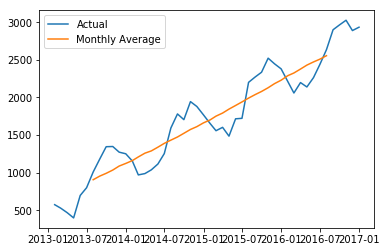

In [45]:
plt.plot(df_year['y'], label='Actual')
plt.plot(df_year['m_avg'], label='Monthly Average')
plt.legend(loc='best')
plt.show()

In [46]:
df_year['sr'] = df_year['y'] / df_year['m_avg']

# Add month numbers
df_year['month'] = df_year.index.month
print(df_year.head(10))
# Extract all January data for example
df_ = df_year.loc[df_year['month']==1]
df_

                      y        m_avg        sr  month
date                                                 
2013-01-31   573.380450          NaN       NaN      1
2013-02-28   527.714935          NaN       NaN      2
2013-03-31   466.634457          NaN       NaN      3
2013-04-30   397.257325          NaN       NaN      4
2013-05-31   696.166346          NaN       NaN      5
2013-06-30   799.167200          NaN       NaN      6
2013-07-31  1008.446020   905.527941  1.113655      7
2013-08-31  1181.793629   953.941605  1.238853      8
2013-09-30  1344.920736   990.767091  1.357454      9
2013-10-31  1347.546319  1034.151085  1.303046     10


,y,m_avg,sr,month
date,,,,
2013-01-31,573.380450,NaN,NaN,1
2014-01-31,1154.344409,1160.131032,0.995012,1
2015-01-31,1654.827521,1701.153082,0.972768,1
2016-01-31,2214.121895,2289.797473,0.966951,1


In [48]:
# Average each month 
df_ = df_year.groupby('month').agg({
        'sr': 'mean'})
df_.reset_index(inplace=True)
df_.columns = ['month', 'usi']
df_.head(20)
# Combine with main data frame
df_year = pd.merge(df_year, df_, on='month', right_index=True).sort_index()
df_year.head(20)

,y,m_avg,sr,month,usi
date,,,,,
2013-01-31,573.380450,NaN,NaN,1,0.978244
2013-02-28,527.714935,NaN,NaN,2,0.858922
2013-03-31,466.634457,NaN,NaN,3,0.867474
2013-04-30,397.257325,NaN,NaN,4,0.829878
2013-05-31,696.166346,NaN,NaN,5,0.884812
2013-06-30,799.167200,NaN,NaN,6,0.920539
2013-07-31,1008.446020,905.527941,1.113655,7,1.090794
2013-08-31,1181.793629,953.941605,1.238853,8,1.187310
2013-09-30,1344.920736,990.767091,1.357454,9,1.199914


In [49]:
df_year['asi'] = df_['usi'].mean() * df_year['usi']
df_year['y_t-s'] = df_year['y'] / df_year['asi']
df_year

,y,m_avg,sr,month,usi,asi,y_t-s
date,,,,,,,
2013-01-31,573.380450,NaN,NaN,1,0.978244,1.002169,572.139436
2013-02-28,527.714935,NaN,NaN,2,0.858922,0.879929,599.724526
2013-03-31,466.634457,NaN,NaN,3,0.867474,0.888690,525.081157
2013-04-30,397.257325,NaN,NaN,4,0.829878,0.850175,467.265296
2013-05-31,696.166346,NaN,NaN,5,0.884812,0.906452,768.012088
2013-06-30,799.167200,NaN,NaN,6,0.920539,0.943053,847.425714
2013-07-31,1008.446020,905.527941,1.113655,7,1.090794,1.117472,902.435412
2013-08-31,1181.793629,953.941605,1.238853,8,1.187310,1.216348,971.591471
2013-09-30,1344.920736,990.767091,1.357454,9,1.199914,1.229261,1094.088739
